## Importando as bibliotecas

In [2]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [3]:
similar("machinelearning", "machine-learning")

0.967741935483871

In [4]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

import cpnet

from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


## Criando o grafo

In [5]:
g = Graph(directed=False) # não-dirigido

t = {}

with open('Github_data.txt', "r") as arquivo:
    arquivo.readline()
    for linha in arquivo:
        try:
            div = linha.split(',')
            top_tag = linha.split('[')[1].split(']')[0].replace("'", "").replace(" ", "").split(",")
            topic = div[2].lower()
            repositorio = div[3]            
            
            if not g.has_vertex(repositorio):
                g.add_vertex(repositorio)
                if top_tag != ['']:
                    t[repositorio] = top_tag
                else:
                    t[repositorio] = [topic]
        except:
            continue

In [6]:
Lista = list(set(item for sublista in t.values() for item in sublista))
print(len(Lista))

3281


In [ ]:
teste = []

for j, i in enumerate(Lista):
    print(f"{j}", end = "\r")
    for b in Lista:
        if similar(i, b) >= 0.8:
            print(similar(i, b))
            if i not in teste:
                teste.append(i)
        else:
            if b not in teste:
                teste.append(b)

1.0
1.0
0.8333333333333334
1.0
1.0
0.8888888888888888
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.8
1.0
0.8571428571428571
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
0.8571428571428571
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8571428571428571
0.9230769230769231
0.8
1.0
1.0
1.0
1.0
0.8
0.8
1.0
1.0
0.8823529411764706
1.0
1.0
1.0
0.8333333333333334
0.8148148148148148
1.0
0.8888888888888888
0.8717948717948718
0.8648648648648649
1.0
0.875
1.0
1.0
1.0
0.8181818181818182
1.0
1.0
1.0
0.8333333333333334
1.0
1.0
1.0
0.8
0.8571428571428571
1.0
0.9714285714285714
0.8387096774193549
1.0
0.8888888888888888
1.0
0.8333333333333334
1.0
1.0
0.9565217391304348
0.8421052631578947
1.0
1.0
0.8
1.0
1.0
1.0
0.8085106382978723
0.8235294117647058
1.0
0.9629629629629629
0.8
1.0
1.0
0.8
1.0
1.0
1.0
0.8571428571428571
1.0
1.0
1.0
0.9090909090909091
1.0
1.0
0.8571428571428571
1.0
1.0
0.8571428571428571
1.0
0.9777777777777777
1.0
1.0
1.0
0.896551724137931
0.8571428571428571
1.0
1.0
1.0
1.0
0.875
1.0
1.0
0.8235294117647058
1.0
0.8
1.0
1.0
1.0
1

In [ ]:
print(len(teste))

In [ ]:
# def teste(lista, lista2):
#     cont = 0
#     for i in lista:
#         for b in lista2:
#             if similar(i, b) >= 0.95:
#                 cont += 1
#     return cont

import itertools

def teste(lista, lista2):
    cache = {}
    cont = 0
    for i, b in itertools.product(lista, lista2):
        if (i, b) in cache:
            cont += cache[(i, b)]
        else:
            sim = similar(i, b)
            if sim >= 0.95:
                cont += 1
            cache[(i, b)] = sim >= 0.95
    return cont

In [ ]:
lista = ["machine-lerning", "bola", "cabeca"]
lista2 = ["machinelerning", "bola", "cabrito", "cabecalho"]

teste(lista, lista2)

In [ ]:
print(len(t.values()))

In [82]:
# # for i in t.keys():
# for p, b in t.items():
#     for i in t:
#         if p != i and not g.has_edge(p, i) and len(set(t[i]).intersection(b)) > 2:
#             g.add_edge(p, i)
            
# for i in t.keys():
cont = 0
for p, b in t.items():
    print(cont, end = "\r")
    for i in t:
        if p != i and not g.has_edge(p, i) and teste(t[i], b) > 2:
            g.add_edge(p, i)
    cont += 1

In [ ]:
g = Graph(directed=False) # não-dirigido

rep = {}

cont = 0

with open('Github_data.txt', "r") as arquivo:
    arquivo.readline()
    for linha in arquivo:
        try:
            div = linha.split(',')
            top_tag = linha.split('[')[1].split(']')[0].replace("'", "").replace(" ", "").split(",")
            topic = div[2].lower()
            repositorio = div[3]

            if repositorio not in rep.keys():
                rep[repositorio] = cont
                cont += 1

            if not g.has_vertex(rep[repositorio]):
                g.add_vertex(rep[repositorio])

            if top_tag != ['']:
                for i in top_tag:
                    if not g.has_vertex(i):
                        g.add_vertex(i)

                    if not g.has_edge(i, rep[repositorio]):
                        g.add_edge(i, rep[repositorio])
            else:                        
                if not g.has_vertex(topic):
                    g.add_vertex(topic)

                if not g.has_edge(topic, rep[repositorio]):
                    g.add_edge(topic, rep[repositorio])
        except:
            continue

In [ ]:
# print(t)
# print(len(t))

# qtd = len( set( [ item for item in t if t.count( item ) > 1] ) )

# for j, i in enumerate(t):
#     if t.count(i) > 1:
#         print(j, i, t.count(i))

In [ ]:
# g = Graph(directed=False) # não-dirigido
# g.add_vp('is_team')

# with open('Github_data.txt', "r") as arquivo:
#     arquivo.readline()
#     for linha in arquivo:
#         try:
#             div = linha.split(',')
#             top_tag = linha.split('[')[1].split(']')[0].replace("'", "").replace(" ", "").split(",")
#             topic = div[2].lower()
#             repositorio = div[3]

#             if not g.has_vertex(repositorio):
#                 v = g.add_vertex(repositorio)
#                 v['is_team'] = False

#             for i in top_tag:
#                 if not g.has_vertex(i):
#                     v = g.add_vertex(i)
#                     v['is_team'] = True 

#                 if not g.has_edge(i, repositorio) and i!= repositorio:
#                     g.add_edge(i, repositorio)
#         except:
#             continue

## Salvando o grafo

In [ ]:
gt_save(g, 'git_hub.net.gz')

## Compilando e renderizando o grafo

In [ ]:
g = gt_load('git_hub.net.gz')
r = netpixi.render('git_hub.net.gz')

## Melhorando visualmento o grafo

In [ ]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

## Análise exploratória do grafo

In [ ]:
# Números de vértices

n = g.num_vertices()
n

In [ ]:
# Número de arestas

m = g.num_edges()
m

In [ ]:
# Número máximo possível de arestas

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

In [ ]:
# Densidade

d = m / max_edges
d

In [ ]:
# Propriedades de cada vértice

data = gt_data(g)

# Degree

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['degree'] = degrees
data

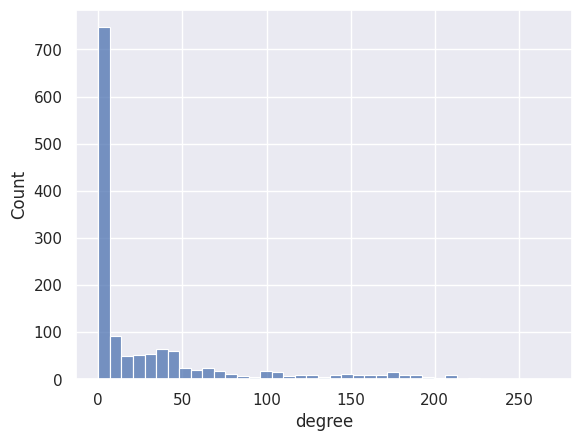

In [14]:
# Histograma do degree

sns.histplot(data['degree']);

## Limpando o grafo

In [83]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'git_hub.net.gz')
netpixi.render('git_hub.net.gz', infinite=True);

In [ ]:
gt_clean(g)
m = gt_draw.fruchterman_reingold_layout(g)
gt_move(g, m)
gt_save(g, 'exemplo.net.gz')
netpixi.render('exemplo.net.gz');